# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layers = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layers)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layers], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {'SGD': {},
           'RMSprop': {},
           'Adagrad': {},
           'Adam': {}
          }
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    model = build_mlp(x_train.shape[-1])
    opt = keras.optimizers.SGD(lr=lr, momentum=MOMENTUM)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']

    name_tag = 'exp-mt-%s' %(str(lr))

    results['SGD'][name_tag] = {'loss': train_loss,
                        'val_loss': val_loss,
                        'acc': train_accuracy,
                        'val_acc': val_accuracy}


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 2.0521 - accuracy: 0.2319WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000027F3D7973A8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

196/196 [==============================] - 4s 23ms/step - loss: 2.3048 - accuracy: 0.0979 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 4s 23ms/step - loss: 2.3041 - accuracy: 0.1007 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3047 - accuracy: 0.0974 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 4s 23ms/step - loss: 2.3051 - accuracy: 0.0999 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 4s 23ms/step - loss: 2.3044 - accuracy: 0.1018 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 4s 23ms/step - loss: 2.3042 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3043 - accuracy: 0.0992 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoc

Epoch 38/50
196/196 [==============================] - 5s 24ms/step - loss: 0.7979 - accuracy: 0.7134 - val_loss: 1.5577 - val_accuracy: 0.5275
Epoch 39/50
196/196 [==============================] - 5s 26ms/step - loss: 0.7653 - accuracy: 0.7250 - val_loss: 1.5123 - val_accuracy: 0.5295
Epoch 40/50
196/196 [==============================] - 5s 24ms/step - loss: 0.7507 - accuracy: 0.7290 - val_loss: 1.5810 - val_accuracy: 0.5194
Epoch 41/50
196/196 [==============================] - 5s 23ms/step - loss: 0.7364 - accuracy: 0.7338 - val_loss: 1.5983 - val_accuracy: 0.5264
Epoch 42/50
196/196 [==============================] - 4s 23ms/step - loss: 0.7312 - accuracy: 0.7349 - val_loss: 1.5513 - val_accuracy: 0.5283
Epoch 43/50
196/196 [==============================] - 4s 23ms/step - loss: 0.7092 - accuracy: 0.7445 - val_loss: 1.5728 - val_accuracy: 0.5257
Epoch 44/50
196/196 [==============================] - 5s 23ms/step - loss: 0.6915 - accuracy: 0.7505 - val_loss: 1.6649 - val_accuracy:

196/196 [==============================] - 5s 26ms/step - loss: 1.1667 - accuracy: 0.5898 - val_loss: 1.3285 - val_accuracy: 0.5334
Epoch 32/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1506 - accuracy: 0.5942 - val_loss: 1.3397 - val_accuracy: 0.5241
Epoch 33/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1319 - accuracy: 0.6022 - val_loss: 1.3185 - val_accuracy: 0.5335
Epoch 34/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1250 - accuracy: 0.6033 - val_loss: 1.3348 - val_accuracy: 0.5257
Epoch 35/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1155 - accuracy: 0.6070 - val_loss: 1.3614 - val_accuracy: 0.5241
Epoch 36/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1085 - accuracy: 0.6090 - val_loss: 1.3394 - val_accuracy: 0.5264
Epoch 37/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0927 - accuracy: 0.6153 - val_loss: 1.3831 - val_accuracy: 0.5149
Epoc

Epoch 25/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6852 - accuracy: 0.4119 - val_loss: 1.6851 - val_accuracy: 0.4153
Epoch 26/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6781 - accuracy: 0.4150 - val_loss: 1.6767 - val_accuracy: 0.4175
Epoch 27/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6722 - accuracy: 0.4177 - val_loss: 1.6697 - val_accuracy: 0.4210
Epoch 28/50
196/196 [==============================] - 4s 23ms/step - loss: 1.6645 - accuracy: 0.4193 - val_loss: 1.6671 - val_accuracy: 0.4206
Epoch 29/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6591 - accuracy: 0.4213 - val_loss: 1.6592 - val_accuracy: 0.4205
Epoch 30/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6533 - accuracy: 0.4241 - val_loss: 1.6528 - val_accuracy: 0.4243
Epoch 31/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6466 - accuracy: 0.4263 - val_loss: 1.6488 - val_accuracy:

196/196 [==============================] - 5s 25ms/step - loss: 2.0811 - accuracy: 0.2696 - val_loss: 2.0805 - val_accuracy: 0.2673
Epoch 19/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0736 - accuracy: 0.2723 - val_loss: 2.0732 - val_accuracy: 0.2707
Epoch 20/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0664 - accuracy: 0.2762 - val_loss: 2.0661 - val_accuracy: 0.2732
Epoch 21/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0594 - accuracy: 0.2789 - val_loss: 2.0592 - val_accuracy: 0.2759
Epoch 22/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0526 - accuracy: 0.2811 - val_loss: 2.0527 - val_accuracy: 0.2804
Epoch 23/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0461 - accuracy: 0.2850 - val_loss: 2.0462 - val_accuracy: 0.2818
Epoch 24/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0397 - accuracy: 0.2882 - val_loss: 2.0400 - val_accuracy: 0.2842
Epoc

In [8]:
for lr in LEARNING_RATE:
    model = build_mlp(x_train.shape[-1])
    opt = keras.optimizers.RMSprop(lr=lr, momentum=MOMENTUM)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']

    name_tag = 'exp-mt-%s' %(str(lr))

    results['RMSprop'][name_tag] = {'loss': train_loss,
                        'val_loss': val_loss,
                        'acc': train_accuracy,
                        'val_acc': val_accuracy}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 37011.3359 - accuracy: 0.0984 ETA: 0s - loss: 44347.8WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000027EACA4D048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `ex

196/196 [==============================] - 6s 28ms/step - loss: 2.3522 - accuracy: 0.0998 - val_loss: 2.3690 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 6s 28ms/step - loss: 2.3551 - accuracy: 0.0987 - val_loss: 2.3413 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 2.3629 - accuracy: 0.1019 - val_loss: 2.3666 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 2.3461 - accuracy: 0.1015 - val_loss: 2.3609 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 2.3578 - accuracy: 0.1015 - val_loss: 2.3848 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 6s 31ms/step - loss: 2.3566 - accuracy: 0.0992 - val_loss: 2.3660 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 2.3545 - accuracy: 0.1016 - val_loss: 2.3744 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 5s 23ms/step - loss: 2.3104 - accuracy: 0.1003 - val_loss: 2.3145 - val_accuracy: 0.1000
Epoch 38/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3115 - accuracy: 0.0997 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 39/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3103 - accuracy: 0.0989 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 40/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3116 - accuracy: 0.1000 - val_loss: 2.3117 - val_accuracy: 0.1000
Epoch 41/50
196/196 [==============================] - 5s 25ms/step - loss: 2.3092 - accuracy: 0.1018 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 42/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3112 - accuracy: 0.1003 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 43/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3093 - accuracy: 0.1008 - val_loss: 2.3139 - val_accuracy: 0.1000
Epoc

Epoch 31/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8380 - accuracy: 0.3188 - val_loss: 1.8484 - val_accuracy: 0.3112
Epoch 32/50
196/196 [==============================] - 5s 28ms/step - loss: 1.8466 - accuracy: 0.3125 - val_loss: 1.8511 - val_accuracy: 0.3092
Epoch 33/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8287 - accuracy: 0.3223 - val_loss: 1.8840 - val_accuracy: 0.3006
Epoch 34/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8268 - accuracy: 0.3224 - val_loss: 1.8395 - val_accuracy: 0.3177
Epoch 35/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8150 - accuracy: 0.3304 - val_loss: 1.9122 - val_accuracy: 0.3019
Epoch 36/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8346 - accuracy: 0.3212 - val_loss: 1.8322 - val_accuracy: 0.3240
Epoch 37/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8334 - accuracy: 0.3211 - val_loss: 1.8501 - val_accuracy:

196/196 [==============================] - 5s 27ms/step - loss: 1.0696 - accuracy: 0.6161 - val_loss: 1.4928 - val_accuracy: 0.5089
Epoch 25/50
196/196 [==============================] - 7s 33ms/step - loss: 1.0399 - accuracy: 0.6281 - val_loss: 1.4918 - val_accuracy: 0.5150
Epoch 26/50
196/196 [==============================] - 7s 36ms/step - loss: 1.0324 - accuracy: 0.6292 - val_loss: 1.5004 - val_accuracy: 0.5144
Epoch 27/50
196/196 [==============================] - 6s 31ms/step - loss: 1.0197 - accuracy: 0.6342 - val_loss: 1.5112 - val_accuracy: 0.5152
Epoch 28/50
196/196 [==============================] - 6s 32ms/step - loss: 1.0024 - accuracy: 0.6400 - val_loss: 1.5234 - val_accuracy: 0.5079
Epoch 29/50
196/196 [==============================] - 6s 31ms/step - loss: 0.9902 - accuracy: 0.6439 - val_loss: 1.5764 - val_accuracy: 0.5041
Epoch 30/50
196/196 [==============================] - 6s 31ms/step - loss: 0.9589 - accuracy: 0.6566 - val_loss: 1.5540 - val_accuracy: 0.5190
Epoc

196/196 [==============================] - 5s 28ms/step - loss: 1.2156 - accuracy: 0.5714 - val_loss: 1.3395 - val_accuracy: 0.5230
Epoch 18/50
196/196 [==============================] - 5s 27ms/step - loss: 1.2052 - accuracy: 0.5764 - val_loss: 1.3465 - val_accuracy: 0.5248
Epoch 19/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1809 - accuracy: 0.5829 - val_loss: 1.3301 - val_accuracy: 0.5381
Epoch 20/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1667 - accuracy: 0.5882 - val_loss: 1.3788 - val_accuracy: 0.5105
Epoch 21/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1580 - accuracy: 0.5896 - val_loss: 1.3496 - val_accuracy: 0.5217
Epoch 22/50
196/196 [==============================] - 5s 27ms/step - loss: 1.1346 - accuracy: 0.6008 - val_loss: 1.3401 - val_accuracy: 0.5307
Epoch 23/50
196/196 [==============================] - 5s 27ms/step - loss: 1.1120 - accuracy: 0.6070 - val_loss: 1.3415 - val_accuracy: 0.5308
Epoc

In [9]:
for lr in LEARNING_RATE:
    model = build_mlp(x_train.shape[-1])
    opt = keras.optimizers.Adagrad(lr=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']

    name_tag = 'exp-mt-%s' %(str(lr))

    results['Adagrad'][name_tag] = {'loss': train_loss,
                        'val_loss': val_loss,
                        'acc': train_accuracy,
                        'val_acc': val_accuracy}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 2.2891 - accuracy: 0.1601WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000027F3D0C04C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

196/196 [==============================] - 5s 25ms/step - loss: 0.9385 - accuracy: 0.6629 - val_loss: 1.7332 - val_accuracy: 0.4594
Epoch 45/50
196/196 [==============================] - 5s 25ms/step - loss: 0.9323 - accuracy: 0.6660 - val_loss: 1.7241 - val_accuracy: 0.4690
Epoch 46/50
196/196 [==============================] - 5s 24ms/step - loss: 0.9169 - accuracy: 0.6734 - val_loss: 1.6116 - val_accuracy: 0.4906
Epoch 47/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8970 - accuracy: 0.6798 - val_loss: 1.6681 - val_accuracy: 0.4773
Epoch 48/50
196/196 [==============================] - 7s 35ms/step - loss: 0.8828 - accuracy: 0.6832 - val_loss: 1.6833 - val_accuracy: 0.4817
Epoch 49/50
196/196 [==============================] - 6s 32ms/step - loss: 0.8645 - accuracy: 0.6899 - val_loss: 1.6556 - val_accuracy: 0.4958
Epoch 50/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8490 - accuracy: 0.6958 - val_loss: 1.7051 - val_accuracy: 0.4875
Epoc

196/196 [==============================] - 5s 28ms/step - loss: 1.1336 - accuracy: 0.6044 - val_loss: 1.4115 - val_accuracy: 0.4943
Epoch 38/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1253 - accuracy: 0.6077 - val_loss: 1.4731 - val_accuracy: 0.4829
Epoch 39/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1168 - accuracy: 0.6089 - val_loss: 1.5519 - val_accuracy: 0.4584
Epoch 40/50
196/196 [==============================] - 5s 26ms/step - loss: 1.1043 - accuracy: 0.6161 - val_loss: 1.4626 - val_accuracy: 0.4909
Epoch 41/50
196/196 [==============================] - 5s 25ms/step - loss: 1.0964 - accuracy: 0.6181 - val_loss: 1.4076 - val_accuracy: 0.5029
Epoch 42/50
196/196 [==============================] - 5s 25ms/step - loss: 1.0900 - accuracy: 0.6220 - val_loss: 1.4980 - val_accuracy: 0.4826
Epoch 43/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0804 - accuracy: 0.6208 - val_loss: 1.3800 - val_accuracy: 0.5139
Epoc

Epoch 31/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6002 - accuracy: 0.4425 - val_loss: 1.6115 - val_accuracy: 0.4345
Epoch 32/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5953 - accuracy: 0.4444 - val_loss: 1.6214 - val_accuracy: 0.4320
Epoch 33/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5898 - accuracy: 0.4461 - val_loss: 1.6026 - val_accuracy: 0.4388
Epoch 34/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5847 - accuracy: 0.4472 - val_loss: 1.5954 - val_accuracy: 0.4414
Epoch 35/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5792 - accuracy: 0.4502 - val_loss: 1.6020 - val_accuracy: 0.4356
Epoch 36/50
196/196 [==============================] - 5s 26ms/step - loss: 1.5742 - accuracy: 0.4508 - val_loss: 1.5919 - val_accuracy: 0.4418
Epoch 37/50
196/196 [==============================] - 5s 28ms/step - loss: 1.5695 - accuracy: 0.4529 - val_loss: 1.5895 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 1.9670 - accuracy: 0.3116 - val_loss: 1.9648 - val_accuracy: 0.3126
Epoch 25/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9614 - accuracy: 0.3139 - val_loss: 1.9591 - val_accuracy: 0.3124
Epoch 26/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9561 - accuracy: 0.3157 - val_loss: 1.9539 - val_accuracy: 0.3139
Epoch 27/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9509 - accuracy: 0.3176 - val_loss: 1.9489 - val_accuracy: 0.3154
Epoch 28/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9460 - accuracy: 0.3202 - val_loss: 1.9441 - val_accuracy: 0.3178
Epoch 29/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9412 - accuracy: 0.3216 - val_loss: 1.9396 - val_accuracy: 0.3205
Epoch 30/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9367 - accuracy: 0.3240 - val_loss: 1.9352 - val_accuracy: 0.3223
Epoc

Epoch 18/50
196/196 [==============================] - 5s 25ms/step - loss: 2.2453 - accuracy: 0.1867 - val_loss: 2.2423 - val_accuracy: 0.1965
Epoch 19/50
196/196 [==============================] - 5s 27ms/step - loss: 2.2426 - accuracy: 0.1888 - val_loss: 2.2396 - val_accuracy: 0.1985
Epoch 20/50
196/196 [==============================] - 5s 25ms/step - loss: 2.2399 - accuracy: 0.1903 - val_loss: 2.2371 - val_accuracy: 0.1995
Epoch 21/50
196/196 [==============================] - 5s 24ms/step - loss: 2.2373 - accuracy: 0.1922 - val_loss: 2.2346 - val_accuracy: 0.2012
Epoch 22/50
196/196 [==============================] - 5s 24ms/step - loss: 2.2348 - accuracy: 0.1943 - val_loss: 2.2321 - val_accuracy: 0.2032
Epoch 23/50
196/196 [==============================] - 5s 24ms/step - loss: 2.2323 - accuracy: 0.1965 - val_loss: 2.2297 - val_accuracy: 0.2046
Epoch 24/50
196/196 [==============================] - 5s 24ms/step - loss: 2.2299 - accuracy: 0.1976 - val_loss: 2.2274 - val_accuracy:

In [10]:
for lr in LEARNING_RATE:
    model = build_mlp(x_train.shape[-1])
    opt = keras.optimizers.Adam(lr=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']

    name_tag = 'exp-mt-%s' %(str(lr))

    results['Adam'][name_tag] = {'loss': train_loss,
                        'val_loss': val_loss,
                        'acc': train_accuracy,
                        'val_acc': val_accuracy}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 229.5704 - accuracy: 0.1002WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000027EABFA0168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

196/196 [==============================] - 5s 27ms/step - loss: 2.3067 - accuracy: 0.1011 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 5s 28ms/step - loss: 2.3069 - accuracy: 0.1011 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 5s 28ms/step - loss: 2.3077 - accuracy: 0.0994 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 5s 25ms/step - loss: 2.3073 - accuracy: 0.1012 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 2.3069 - accuracy: 0.0976 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3071 - accuracy: 0.1011 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3062 - accuracy: 0.1012 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoc

Epoch 38/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5436 - accuracy: 0.4470 - val_loss: 1.6648 - val_accuracy: 0.4158
Epoch 39/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5467 - accuracy: 0.4464 - val_loss: 1.6110 - val_accuracy: 0.4257
Epoch 40/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5345 - accuracy: 0.4486 - val_loss: 1.6172 - val_accuracy: 0.4210
Epoch 41/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5568 - accuracy: 0.4427 - val_loss: 1.6215 - val_accuracy: 0.4194
Epoch 42/50
196/196 [==============================] - 5s 26ms/step - loss: 1.5501 - accuracy: 0.4443 - val_loss: 1.6319 - val_accuracy: 0.4137
Epoch 43/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5455 - accuracy: 0.4455 - val_loss: 1.6049 - val_accuracy: 0.4248
Epoch 44/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5362 - accuracy: 0.4517 - val_loss: 1.6216 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 0.9322 - accuracy: 0.6677 - val_loss: 1.4297 - val_accuracy: 0.5258
Epoch 32/50
196/196 [==============================] - 5s 25ms/step - loss: 0.9122 - accuracy: 0.6731 - val_loss: 1.4354 - val_accuracy: 0.5236
Epoch 33/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8911 - accuracy: 0.6820 - val_loss: 1.4433 - val_accuracy: 0.5252
Epoch 34/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8804 - accuracy: 0.6862 - val_loss: 1.4598 - val_accuracy: 0.5244
Epoch 35/50
196/196 [==============================] - 5s 25ms/step - loss: 0.8605 - accuracy: 0.6931 - val_loss: 1.4778 - val_accuracy: 0.5292
Epoch 36/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8412 - accuracy: 0.7008 - val_loss: 1.5038 - val_accuracy: 0.5305
Epoch 37/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8203 - accuracy: 0.7058 - val_loss: 1.5431 - val_accuracy: 0.5173
Epoc

Epoch 25/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1236 - accuracy: 0.6053 - val_loss: 1.3223 - val_accuracy: 0.5339
Epoch 26/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1112 - accuracy: 0.6113 - val_loss: 1.3188 - val_accuracy: 0.5302
Epoch 27/50
196/196 [==============================] - 5s 24ms/step - loss: 1.1011 - accuracy: 0.6146 - val_loss: 1.3371 - val_accuracy: 0.5312
Epoch 28/50
196/196 [==============================] - 5s 25ms/step - loss: 1.0784 - accuracy: 0.6253 - val_loss: 1.3338 - val_accuracy: 0.5302
Epoch 29/50
196/196 [==============================] - 5s 25ms/step - loss: 1.0693 - accuracy: 0.6252 - val_loss: 1.3557 - val_accuracy: 0.5246
Epoch 30/50
196/196 [==============================] - 5s 24ms/step - loss: 1.0579 - accuracy: 0.6307 - val_loss: 1.3331 - val_accuracy: 0.5305
Epoch 31/50
196/196 [==============================] - 5s 24ms/step - loss: 1.0429 - accuracy: 0.6348 - val_loss: 1.3468 - val_accuracy:

196/196 [==============================] - 5s 27ms/step - loss: 1.5653 - accuracy: 0.4577 - val_loss: 1.5814 - val_accuracy: 0.4481
Epoch 19/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5559 - accuracy: 0.4596 - val_loss: 1.5725 - val_accuracy: 0.4487
Epoch 20/50
196/196 [==============================] - 5s 26ms/step - loss: 1.5475 - accuracy: 0.4619 - val_loss: 1.5681 - val_accuracy: 0.4482
Epoch 21/50
196/196 [==============================] - 5s 28ms/step - loss: 1.5393 - accuracy: 0.4659 - val_loss: 1.5584 - val_accuracy: 0.4566
Epoch 22/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5299 - accuracy: 0.4695 - val_loss: 1.5506 - val_accuracy: 0.4549
Epoch 23/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5244 - accuracy: 0.4700 - val_loss: 1.5473 - val_accuracy: 0.4612
Epoch 24/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5153 - accuracy: 0.4749 - val_loss: 1.5412 - val_accuracy: 0.4575
Epoc

C:\Users\JoeZhong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


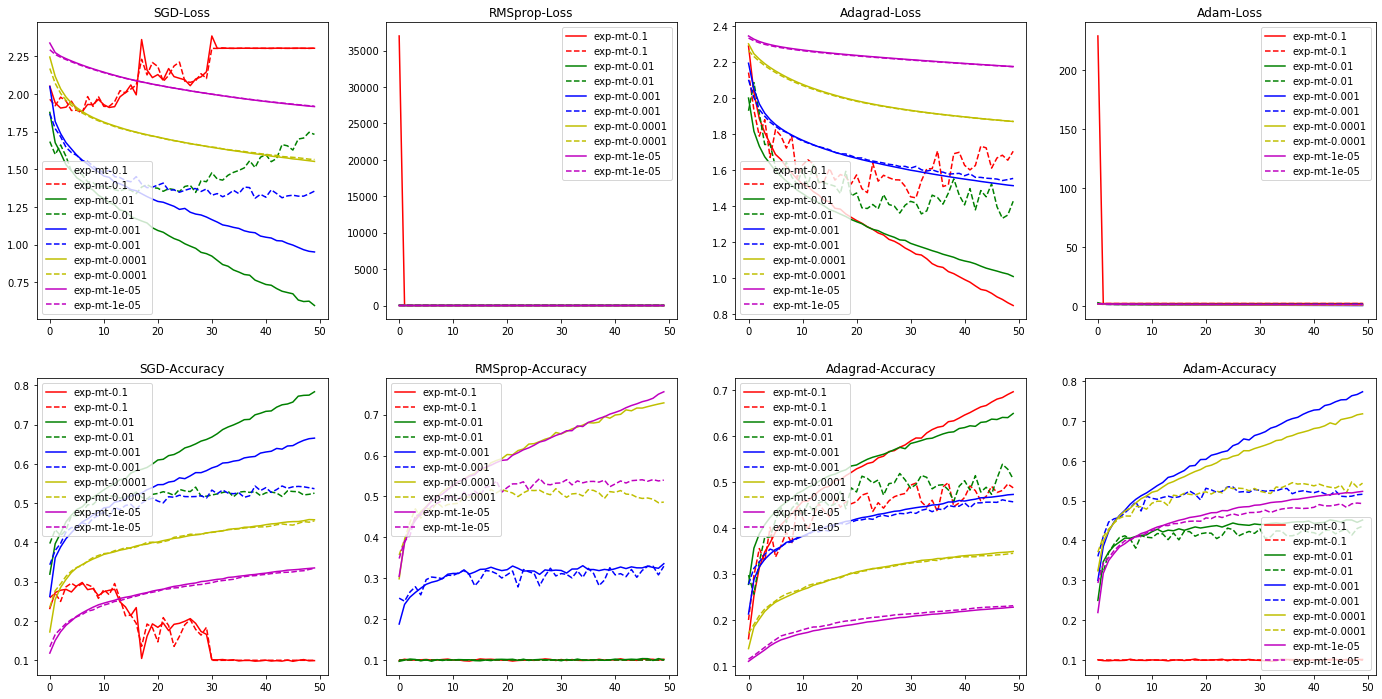

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]
fig, ax = plt.subplots(2,4, figsize=(24,12))
for i, opt in enumerate(results.keys()):
    for j, cond in enumerate(results['SGD'].keys()):
        ax[0][i].plot(range(len(results[opt][cond]['loss'])), results[opt][cond]['loss'], '-', label=cond, color=color_bar[j])
        ax[0][i].plot(range(len(results[opt][cond]['val_loss'])), results[opt][cond]['val_loss'], '--', label=cond, color=color_bar[j])
        ax[0][i].set_title('%s-Loss' %(opt))
        ax[0][i].legend()
        
        ax[1][i].plot(range(len(results[opt][cond]['acc'])), results[opt][cond]['acc'], '-', label=cond, color=color_bar[j])
        ax[1][i].plot(range(len(results[opt][cond]['val_acc'])), results[opt][cond]['val_acc'], '--', label=cond, color=color_bar[j])
        ax[1][i].set_title('%s-Accuracy'%(opt))
        ax[1][i].legend()
fig.show()